In [11]:
!apt-get update
!apt-get install -y build-essential cmake libboost-all-dev


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:5 https://cli.github.com/packages stable InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,065 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages

In [12]:
!rm -rf Guided-PIBT
!git clone https://github.com/nobodyczcz/Guided-PIBT.git
%cd Guided-PIBT
!ls -la


Cloning into 'Guided-PIBT'...
remote: Enumerating objects: 3176, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 3176 (delta 8), reused 13 (delta 3), pack-reused 3150 (from 1)
Receiving objects: 100% (3176/3176), 71.99 MiB | 25.18 MiB/s, done.
Resolving deltas: 100% (1125/1125), done.
Updating files: 100% (3090/3090), done.
/content/Guided-PIBT
total 36
drwxr-xr-x 5 root root 4096 Oct  5 10:27 .
drwxr-xr-x 1 root root 4096 Oct  5 10:27 ..
drwxr-xr-x 8 root root 4096 Oct  5 10:27 .git
-rw-r--r-- 1 root root   34 Oct  5 10:27 .gitignore
drwxr-xr-x 6 root root 4096 Oct  5 10:27 guided-lacam2
drwxr-xr-x 7 root root 4096 Oct  5 10:27 guided-pibt
-rw-r--r-- 1 root root 1048 Oct  5 10:27 LICENCE.txt
-rw-r--r-- 1 root root 6120 Oct  5 10:27 README.md


In [14]:
import os

# Fix Types.h
types_file = 'guided-pibt/traffic_mapf/Types.h'
if os.path.exists(types_file):
    with open(types_file, 'r') as f:
        content = f.read()

    if '#include <chrono>' not in content:
        lines = content.split('\n')
        new_lines = []
        added = False
        for line in lines:
            new_lines.append(line)
            if '#include <iostream>' in line and not added:
                new_lines.append('#include <chrono>')
                added = True

        with open(types_file, 'w') as f:
            f.write('\n'.join(new_lines))
        print("✅ Fixed Types.h")
    else:
        print("✅ Types.h already has chrono")
else:
    print("❌ Types.h not found")

# Fix flow.hpp
flow_file = 'guided-pibt/traffic_mapf/flow.hpp'
if os.path.exists(flow_file):
    with open(flow_file, 'r') as f:
        content = f.read()

    if '#include <chrono>' not in content:
        lines = content.split('\n')
        new_lines = []
        added = False
        for line in lines:
            new_lines.append(line)
            if '#include' in line and not added and 'pragma' not in line:
                new_lines.append('#include <chrono>')
                added = True

        with open(flow_file, 'w') as f:
            f.write('\n'.join(new_lines))
        print("✅ Fixed flow.hpp")
    else:
        print("✅ flow.hpp already has chrono")
else:
    print("❌ flow.hpp not found")

# Fix TrajLNS.h
traj_file = 'guided-pibt/traffic_mapf/TrajLNS.h'
if os.path.exists(traj_file):
    with open(traj_file, 'r') as f:
        content = f.read()

    if '#include <chrono>' not in content:
        lines = content.split('\n')
        new_lines = []
        added = False
        for line in lines:
            new_lines.append(line)
            if '#include' in line and not added and 'pragma' not in line:
                new_lines.append('#include <chrono>')
                added = True

        with open(traj_file, 'w') as f:
            f.write('\n'.join(new_lines))
        print("✅ Fixed TrajLNS.h")
    else:
        print("✅ TrajLNS.h already has chrono")
else:
    print("❌ TrajLNS.h not found")

print("\n🔧 All header fixes applied!")


✅ Fixed Types.h
✅ Fixed flow.hpp
✅ Fixed TrajLNS.h

🔧 All header fixes applied!


In [15]:
!cmake -B guided-lacam2-build ./guided-lacam2 \
    -DGUIDANCE=ON \
    -DGUIDANCE_LNS=5000 \
    -DFLOW_GUIDANCE=OFF \
    -DINIT_PP=ON \
    -DOBJECTIVE=1 \
    -DCMAKE_BUILD_TYPE=RELEASE \
    -DFOCAL_SEARCH=2 \
    -DGUID_T=30

!make -C guided-lacam2-build -j$(nproc)


-- Guidance is enabled 
-- Guidance LNS is enabled: 5000
-- LNS_GROUP_SIZE is set to: 1
-- INIT_PP is enabled
-- GUID_T is enabled: 30
-- OBJECTIVE is enabled: 1
-- FOCAL_SEARCH is enabled: 2
CMake Deprecation Warning at third_party/googletest/CMakeLists.txt:4 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Deprecation Warning at third_party/googletest/googlemock/CMakeLists.txt:39 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Depr

In [16]:
import os

if os.path.exists('guided-lacam2-build/main'):
    print("✅ Build SUCCESSFUL! Binary created.")
    !ls -lh guided-lacam2-build/main
else:
    print("❌ Build FAILED. Binary not found.")


✅ Build SUCCESSFUL! Binary created.
-rwxr-xr-x 1 root root 464K Oct  5 10:31 guided-lacam2-build/main


In [17]:
!echo "📁 Available Maps:"
!ls -lh guided-lacam2/assets/*.map

!echo "\n📁 Available Scenarios:"
!ls -lh guided-lacam2/assets/*.scen


📁 Available Maps:
-rw-r--r-- 1 root root   52 Oct  5 10:27 guided-lacam2/assets/dislike-example.map
-rw-r--r-- 1 root root  105 Oct  5 10:27 guided-lacam2/assets/empty-8-8.map
-rw-r--r-- 1 root root   52 Oct  5 10:27 guided-lacam2/assets/loop.map
-rw-r--r-- 1 root root 1.1K Oct  5 10:27 guided-lacam2/assets/random-32-32-10.map
-rw-r--r-- 1 root root 1.1K Oct  5 10:27 guided-lacam2/assets/random-32-32-20.map
\n📁 Available Scenarios:
-rw-r--r-- 1 root root 227 Oct  5 10:27 guided-lacam2/assets/dislike-example.scen
-rw-r--r-- 1 root root  84 Oct  5 10:27 guided-lacam2/assets/loop.scen
-rw-r--r-- 1 root root 23K Oct  5 10:27 guided-lacam2/assets/random-32-32-10-random-1.scen


In [18]:
!./guided-lacam2-build/main \
    -m guided-lacam2/assets/random-32-32-10.map \
    -i guided-lacam2/assets/random-32-32-10-random-1.scen \
    -t 60 \
    -N 20 \
    -v 3 \
    -O 3


---init-agents:20
---init-t,1891
---op-flow,0
---vertex-flow,1
---lns-t,1906296
---op-flow,0
---vertex-flow0
---setup-t,1906561
elapsed:  1906ms  loop_cnt:       0  node_cnt:       0	Guidance Setup
elapsed:  1906ms  loop_cnt:       0  node_cnt:       0	start search
elapsed:  1907ms  loop_cnt:      54  node_cnt:      54	found solution, cost: 511
elapsed:  1907ms  loop_cnt:      85  node_cnt:      59	cost update: 511 -> 509
elapsed:  1907ms  loop_cnt:     124  node_cnt:      72	cost update: 509 -> 508
elapsed:  1908ms  loop_cnt:     158  node_cnt:      79	cost update: 508 -> 507
elapsed:  1908ms  loop_cnt:     214  node_cnt:     103	cost update: 507 -> 506
elapsed:  1908ms  loop_cnt:     259  node_cnt:     115	cost update: 506 -> 505
elapsed:  1909ms  loop_cnt:     303  node_cnt:     126	cost update: 505 -> 494
elapsed:  1909ms  loop_cnt:     332  node_cnt:     129	cost update: 494 -> 492
elapsed: 60016ms  loop_cnt:   81415  node_cnt:   77690	solved sub-optimally, objective: sum_of_cost


In [19]:
!./guided-lacam2-build/main \
    -m guided-lacam2/assets/random-32-32-10.map \
    -i guided-lacam2/assets/random-32-32-10-random-1.scen \
    -t 120 \
    -N 50 \
    -v 2 \
    -O 3 \
    > results_50agents.txt

!echo "📊 Results Summary:"
!tail -20 results_50agents.txt


📊 Results Summary:
elapsed:  1764ms  loop_cnt:    1471  node_cnt:     916	cost update: 1338 -> 1334
elapsed:  1764ms  loop_cnt:    1497  node_cnt:     940	cost update: 1334 -> 1333
elapsed:  1764ms  loop_cnt:    1538  node_cnt:     963	cost update: 1333 -> 1332
elapsed:  1765ms  loop_cnt:    1581  node_cnt:     985	cost update: 1332 -> 1331
elapsed:  1766ms  loop_cnt:    1646  node_cnt:    1023	cost update: 1331 -> 1330
elapsed:  1766ms  loop_cnt:    1674  node_cnt:    1029	cost update: 1330 -> 1329
elapsed:  1766ms  loop_cnt:    1699  node_cnt:    1036	cost update: 1329 -> 1327
elapsed:  1852ms  loop_cnt:    5236  node_cnt:    3103	cost update: 1327 -> 1315
elapsed:  1920ms  loop_cnt:    8326  node_cnt:    4897	cost update: 1315 -> 1304
elapsed:  2419ms  loop_cnt:   13761  node_cnt:    8115	cost update: 1304 -> 1302
elapsed:  2486ms  loop_cnt:   16288  node_cnt:    9269	cost update: 1302 -> 1292
elapsed:  2486ms  loop_cnt:   16301  node_cnt:    9275	cost update: 1292 -> 1291
elapsed: 

In [20]:
import re

try:
    with open('results_50agents.txt', 'r') as f:
        output = f.read()

    solved = re.search(r'solved=(\d+)', output)
    sum_of_costs = re.search(r'sum_of_costs=(\d+)', output)
    makespan = re.search(r'makespan=(\d+)', output)
    comp_time = re.search(r'comp_time\(ms\)=([\d.]+)', output)

    print("=" * 60)
    print("🎯 GUIDED-LACAM2 RESULTS")
    print("=" * 60)
    print(f"Solved: {solved.group(1) if solved else 'N/A'}")
    print(f"Sum of Costs: {sum_of_costs.group(1) if sum_of_costs else 'N/A'}")
    print(f"Makespan: {makespan.group(1) if makespan else 'N/A'}")
    print(f"Computation Time: {comp_time.group(1) if comp_time else 'N/A'} ms")
    print("=" * 60)
except:
    print("❌ Could not parse results. Check results_50agents.txt manually")
    !cat results_50agents.txt


🎯 GUIDED-LACAM2 RESULTS
Solved: N/A
Sum of Costs: N/A
Makespan: N/A
Computation Time: N/A ms


In [23]:
!./guided-lacam2-build/main \
    -m guided-lacam2/assets/random-32-32-10.map \
    -i guided-lacam2/assets/random-32-32-10-random-1.scen \
    -t 30 \
    -N 10 \
    -v 1 \
    -O 3 \
    > solution_text.txt 2>&1

!echo "✅ Solution saved!"
!tail -30 solution_text.txt


✅ Solution saved!
---init-agents:10
---init-t,1496
---op-flow,0
---vertex-flow,0
---lns-t,1809157
---op-flow,0
---vertex-flow0
---setup-t,1809295
solved: 1810ms	makespan: 53 (lb=53, ub=1)	sum_of_costs: 232 (lb=232, ub=1)	sum_of_loss: 232 (lb=232, ub=1)



✅ Problem setup visualization saved!


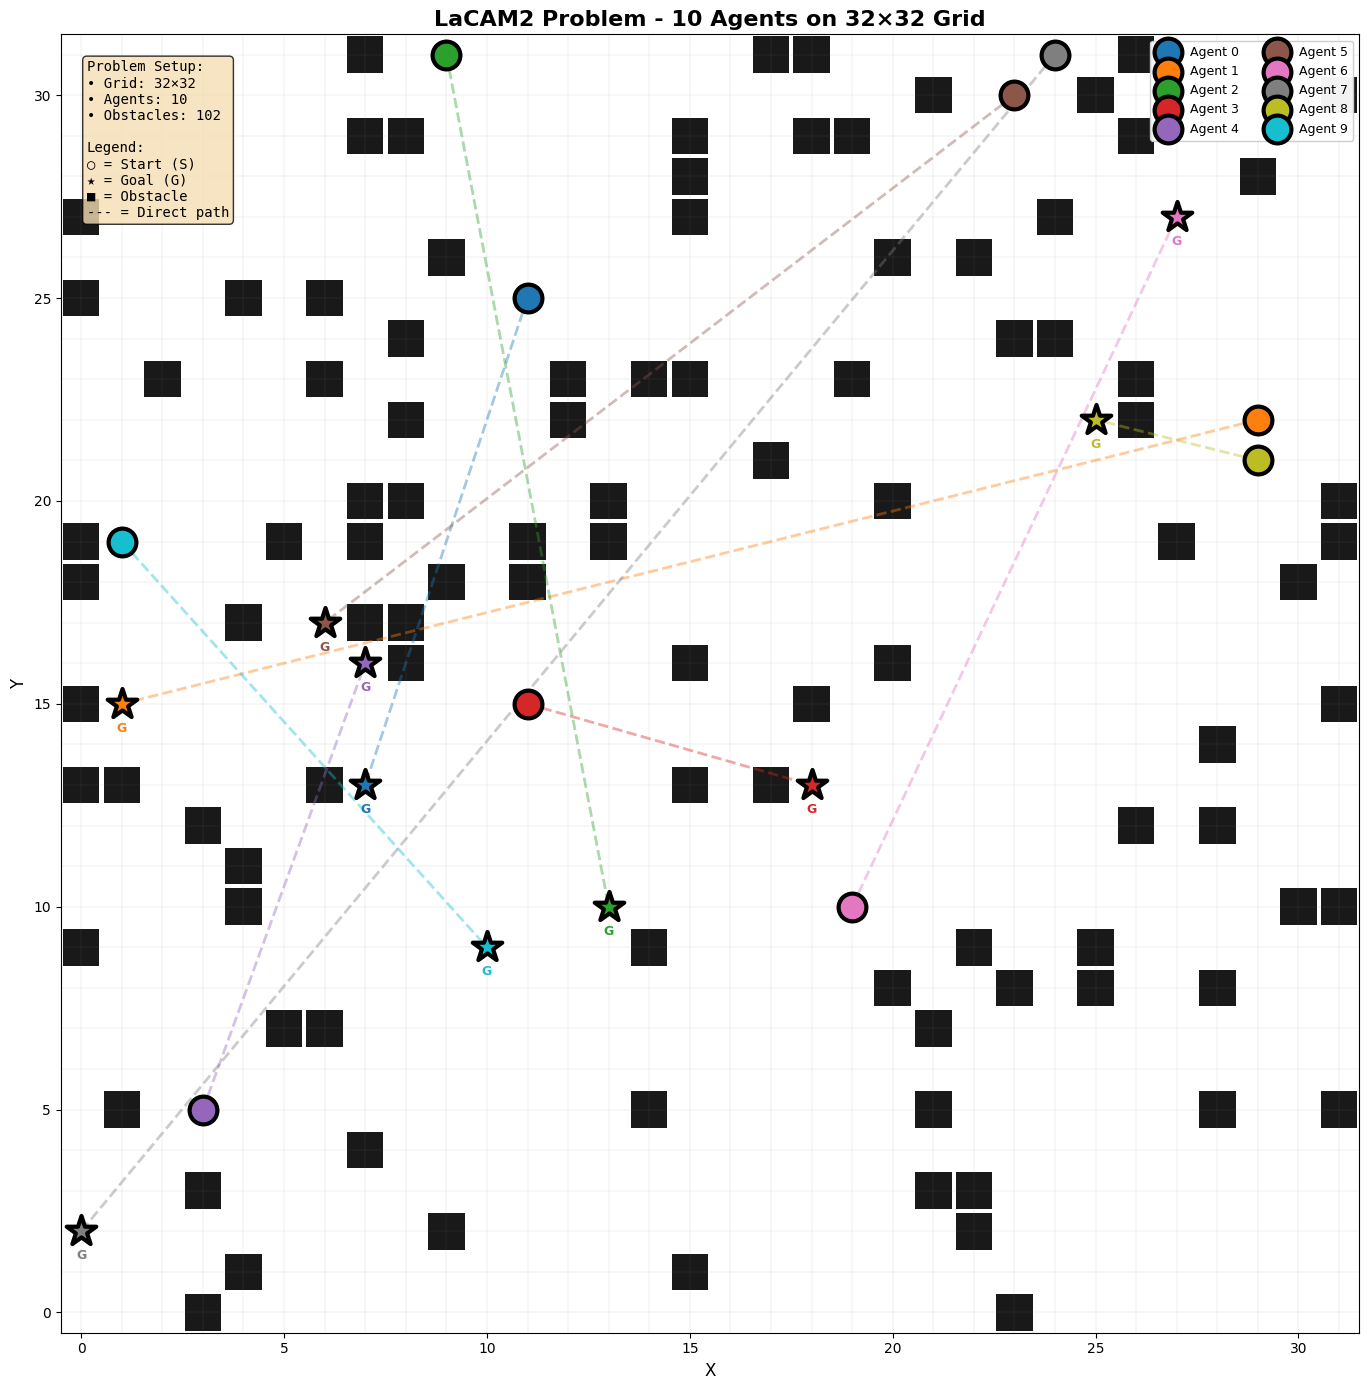

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Load map
with open('guided-lacam2/assets/random-32-32-10.map', 'r') as f:
    lines = f.readlines()

grid = []
for line in lines[4:]:  # Skip header
    grid.append(list(line.strip()))

height = len(grid)
width = len(grid[0]) if height > 0 else 0

# Load scenario (start/goal positions)
with open('guided-lacam2/assets/random-32-32-10-random-1.scen', 'r') as f:
    scen_lines = f.readlines()[1:]  # Skip version line

num_agents = 10
agents = []
for i in range(num_agents):
    parts = scen_lines[i].strip().split('\t')
    agents.append({
        'start': (int(parts[4]), int(parts[5])),
        'goal': (int(parts[6]), int(parts[7]))
    })

# Create visualization
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_xlim(-0.5, width - 0.5)
ax.set_ylim(-0.5, height - 0.5)
ax.set_aspect('equal')
ax.set_title(f'LaCAM2 Problem - {num_agents} Agents on {width}×{height} Grid',
             fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)

# Draw grid
for x in range(width):
    ax.axvline(x, color='gray', linewidth=0.3, alpha=0.3)
for y in range(height):
    ax.axhline(y, color='gray', linewidth=0.3, alpha=0.3)

# Draw obstacles
for y in range(height):
    for x in range(width):
        if grid[y][x] == '@' or grid[y][x] == 'T':
            ax.add_patch(mpatches.Rectangle((x-0.45, (height-y-1)-0.45), 0.9, 0.9,
                                           facecolor='black', alpha=0.9))

# Draw agents
colors = plt.cm.tab10(np.linspace(0, 1, num_agents))

for idx, agent in enumerate(agents):
    start_x, start_y = agent['start']
    goal_x, goal_y = agent['goal']

    # Convert Y coordinate (flip)
    start_y_plot = height - start_y - 1
    goal_y_plot = height - goal_y - 1

    # Draw straight line (heuristic path)
    ax.plot([start_x, goal_x], [start_y_plot, goal_y_plot],
            '--', color=colors[idx], linewidth=2, alpha=0.4)

    # Start position
    ax.scatter(start_x, start_y_plot, s=400, c=[colors[idx]], marker='o',
               edgecolors='black', linewidths=3, zorder=10, label=f'Agent {idx}')
    ax.text(start_x, start_y_plot, 'S', ha='center', va='center',
            fontsize=10, fontweight='bold', color='white')

    # Goal position
    ax.scatter(goal_x, goal_y_plot, s=500, c=[colors[idx]], marker='*',
               edgecolors='black', linewidths=3, zorder=10)
    ax.text(goal_x, goal_y_plot-0.6, 'G', ha='center', va='center',
            fontsize=9, fontweight='bold', color=colors[idx])

ax.legend(loc='upper right', fontsize=9, ncol=2, framealpha=0.95)

# Add info box
info_text = f"""Problem Setup:
• Grid: {width}×{height}
• Agents: {num_agents}
• Obstacles: {sum(row.count('@') + row.count('T') for row in grid)}

Legend:
○ = Start (S)
★ = Goal (G)
■ = Obstacle
--- = Direct path"""

ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
        verticalalignment='top', fontsize=10, family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('lacam2_problem_setup.png', dpi=150, bbox_inches='tight')
print("\n✅ Problem setup visualization saved!")
plt.show()

from google.colab import files
files.download('lacam2_problem_setup.png')


In [25]:
import re

with open('solution_text.txt', 'r') as f:
    output = f.read()

# Extract metrics
makespan = re.search(r'makespan:\s*(\d+)', output)
sum_costs = re.search(r'sum_of_costs:\s*(\d+)', output)
sum_loss = re.search(r'sum_of_loss:\s*(\d+)', output)
time = re.search(r'solved:\s*([\d.]+)ms', output)

print("=" * 70)
print("🎯 LACAM2 SOLUTION SUMMARY")
print("=" * 70)
print(f"Agents: {num_agents}")
print(f"Grid Size: {width}×{height}")
print(f"\nResults:")
print(f"  Makespan: {makespan.group(1) if makespan else 'N/A'} timesteps")
print(f"  Sum of Costs: {sum_costs.group(1) if sum_costs else 'N/A'}")
print(f"  Sum of Loss: {sum_loss.group(1) if sum_loss else 'N/A'}")
print(f"  Solve Time: {time.group(1) if time else 'N/A'} ms")
print("=" * 70)


🎯 LACAM2 SOLUTION SUMMARY
Agents: 10
Grid Size: 32×32

Results:
  Makespan: 53 timesteps
  Sum of Costs: 232
  Sum of Loss: 232
  Solve Time: 1810 ms


In [26]:
# Clone the visualizer
!git clone https://github.com/Kei18/mapf-visualizer.git
%cd mapf-visualizer

# Install Node.js and dependencies
!apt-get install -y nodejs npm
!npm install
!npm run build

%cd /content/Guided-PIBT


Cloning into 'mapf-visualizer'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 394 (delta 118), reused 129 (delta 105), pack-reused 224 (from 1)
Receiving objects: 100% (394/394), 10.45 MiB | 23.78 MiB/s, done.
Resolving deltas: 100% (188/188), done.
/content/Guided-PIBT/mapf-visualizer
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js
  libjs-inherits libjs-is-typedarray libjs-psl libjs-source-map
  libjs-sprintf-js libjs-typedarray-to-buffer libnode-dev libnode72
  libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy
  node-are-we-there-yet node-argparse node-arrify node-asap node-asynckit
  node-balanced-match node-brace-

In [27]:
# Run and save solution
!./guided-lacam2-build/main \
    -m guided-lacam2/assets/random-32-32-10.map \
    -i guided-lacam2/assets/random-32-32-10-random-1.scen \
    -t 60 \
    -N 10 \
    -v 1 \
    -O 3 \
    -o output_solution.txt

!echo "✅ Solution saved to output_solution.txt"
!head -30 output_solution.txt


---init-agents:10
---init-t,1071
---op-flow,0
---vertex-flow,0
---lns-t,2171097
---op-flow,0
---vertex-flow0
---setup-t,2171303
solved: 2172ms	makespan: 53 (lb=53, ub=1)	sum_of_costs: 232 (lb=232, ub=1)	sum_of_loss: 232 (lb=232, ub=1)
✅ Solution saved to output_solution.txt
agents=10
map_file=random-32-32-10.map
solver=planner
solved=1
soc=232
soc_lb=232
makespan=53
makespan_lb=53
sum_of_loss=232
sum_of_loss_lb=232
comp_time=2172
seed=0
optimal=1
objective=3
loop_cnt=108
num_node_gen=54
starts=(11,6),(29,9),(9,0),(11,16),(3,26),(23,1),(19,21),(24,0),(29,10),(1,12),
goals=(7,18),(1,16),(13,21),(18,18),(7,15),(6,14),(27,4),(0,29),(25,9),(10,22),
solution=
0:(11,6),(29,9),(9,0),(11,16),(3,26),(23,1),(19,21),(24,0),(29,10),(1,12),
1:(11,7),(29,10),(9,1),(11,17),(4,26),(23,2),(19,20),(24,1),(28,10),(1,13),
2:(11,8),(28,10),(9,2),(12,17),(4,25),(22,2),(19,19),(24,2),(27,10),(1,14),
3:(11,9),(27,10),(9,3),(13,17),(4,24),(21,2),(19,18),(23,2),(26,10),(1,15),
4:(11,10),(26,10),(9,4),(14,17),(4,

In [28]:
%cd mapf-visualizer
!npm start &

# Print access instructions
import time
print("\n" + "="*70)
print("🎥 MAPF VISUALIZER STARTING...")
print("="*70)
print("\n📺 To view the visualization:")
print("1. Wait 10 seconds for server to start")
print("2. Click the URL shown above (usually http://localhost:3000)")
print("3. Load map: /content/Guided-PIBT/guided-lacam2/assets/random-32-32-10.map")
print("4. Load solution: /content/Guided-PIBT/output_solution.txt")
print("\n⏯️  You can play/pause/step through the animation!")
print("="*70)

time.sleep(10)


/content/Guided-PIBT/mapf-visualizer
npm ERR! code ENOENT
npm ERR! syscall open
npm ERR! path /content/Guided-PIBT/mapf-visualizer/package.json
npm ERR! errno -2
npm ERR! enoent ENOENT: no such file or directory, open '/content/Guided-PIBT/mapf-visualizer/package.json'
npm ERR! enoent This is related to npm not being able to find a file.
npm ERR! enoent 

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2025-10-05T10_51_06_866Z-debug-0.log

🎥 MAPF VISUALIZER STARTING...

📺 To view the visualization:
1. Wait 10 seconds for server to start
2. Click the URL shown above (usually http://localhost:3000)
3. Load map: /content/Guided-PIBT/guided-lacam2/assets/random-32-32-10.map
4. Load solution: /content/Guided-PIBT/output_solution.txt

⏯️  You can play/pause/step through the animation!


In [32]:
%cd /content/Guided-PIBT

# The output_solution.txt you had earlier has the full solution
# Let's check if it's still there
!ls -lh output_solution.txt

# If not, re-run with verbose output
!./guided-lacam2-build/main \
    -m guided-lacam2/assets/random-32-32-10.map \
    -i guided-lacam2/assets/random-32-32-10-random-1.scen \
    -t 60 \
    -N 10 \
    -v 3 \
    -O 3 \
    2>&1 | tee complete_solution.txt

# Show the end of file to see if we have solution data
!echo "\n📄 Checking for solution data:"
!grep -A 60 "solution=" complete_solution.txt | head -100


/content/Guided-PIBT
-rw-r--r-- 1 root root 4.5K Oct  5 10:51 output_solution.txt
---init-agents:10
---init-t,2515
---op-flow,0
---vertex-flow,0
---lns-t,1886491
---op-flow,0
---vertex-flow0
---setup-t,1886660
elapsed:  1886ms  loop_cnt:       0  node_cnt:       0	Guidance Setup
elapsed:  1887ms  loop_cnt:       0  node_cnt:       0	start search
elapsed:  1887ms  loop_cnt:      54  node_cnt:      54	found solution, cost: 232
elapsed:  1887ms  loop_cnt:     108  node_cnt:      54	solved optimally, objective: sum_of_cost
solved: 1887ms	makespan: 53 (lb=53, ub=1)	sum_of_costs: 232 (lb=232, ub=1)	sum_of_loss: 232 (lb=232, ub=1)
\n📄 Checking for solution data:


In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import matplotlib.patches as mpatches
import numpy as np
import re

# Try to read from either file
solution_text = None
for filename in ['output_solution.txt', 'complete_solution.txt']:
    try:
        with open(filename, 'r') as f:
            content = f.read()
        if 'solution=' in content:
            solution_text = content.split('solution=')[1].split('\n\n')[0]
            print(f"✅ Found solution in {filename}")
            break
    except:
        pass

if not solution_text:
    print("❌ No solution found. Let's check what we have:")
    !cat output_solution.txt
    raise ValueError("Cannot find solution data")

# Parse timesteps from the solution
lines = solution_text.strip().split('\n')
timesteps = {}

for line in lines:
    line = line.strip()
    if not line or line.startswith(('agents=', 'map_file=', 'starts=', 'goals=')):
        continue

    if ':' in line and line[0].isdigit():
        parts = line.split(':', 1)
        try:
            t = int(parts[0])
            positions = re.findall(r'\((\d+),(\d+)\)', parts[1])
            if positions:
                timesteps[t] = [(int(x), int(y)) for x, y in positions]
        except:
            continue

if not timesteps:
    print("❌ Could not parse timesteps")
    print("Sample lines:")
    for line in lines[:20]:
        print(line)
    raise ValueError("No valid timesteps")

num_agents = len(timesteps[0])
max_time = max(timesteps.keys())

print(f"\n✅ Successfully parsed:")
print(f"   • Agents: {num_agents}")
print(f"   • Timesteps: 0 to {max_time}")
print(f"   • Start positions: {timesteps[0]}")
print(f"   • End positions: {timesteps[max_time]}")

# Load map
with open('guided-lacam2/assets/random-32-32-10.map', 'r') as f:
    map_lines = f.readlines()

grid = []
for line in map_lines[4:]:
    grid.append(list(line.strip()))

height = len(grid)
width = len(grid[0]) if height > 0 else 0

# Load goals
with open('guided-lacam2/assets/random-32-32-10-random-1.scen', 'r') as f:
    scen_lines = f.readlines()[1:]

goals = []
for i in range(num_agents):
    parts = scen_lines[i].strip().split('\t')
    goals.append((int(parts[6]), int(parts[7])))

# Verify agents reach goals
final_positions = timesteps[max_time]
all_at_goal = all((x, y) == goals[i] for i, (x, y) in enumerate(final_positions))
print(f"\n✅ All agents reach goals: {all_at_goal}")
if not all_at_goal:
    for i, (x, y) in enumerate(final_positions):
        gx, gy = goals[i]
        if (x, y) != (gx, gy):
            print(f"   ⚠️  Agent {i}: at ({x},{y}), goal ({gx},{gy})")

# Create animation
colors = plt.cm.tab10(np.linspace(0, 1, num_agents))
fig, ax = plt.subplots(figsize=(14, 14))

def init():
    ax.clear()
    ax.set_xlim(-0.5, width - 0.5)
    ax.set_ylim(-0.5, height - 0.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2)

    for y in range(height):
        for x in range(width):
            if grid[y][x] in ['@', 'T']:
                ax.add_patch(mpatches.Rectangle((x-0.45, (height-y-1)-0.45), 0.9, 0.9,
                                               facecolor='black', alpha=0.9, zorder=1))

    for agent_id, (gx, gy) in enumerate(goals):
        gy_plot = height - gy - 1
        ax.scatter(gx, gy_plot, s=400, c=[colors[agent_id]], marker='*',
                  edgecolors='black', linewidths=2, zorder=3, alpha=0.4)
        ax.text(gx+0.5, gy_plot+0.5, f'G{agent_id}', fontsize=8, color=colors[agent_id])

def animate(t):
    init()
    progress = (t / max_time) * 100
    ax.set_title(f'LaCAM2 Collision-Free Solution | Timestep {t}/{max_time} ({progress:.0f}%)',
                 fontsize=16, fontweight='bold')

    if t in timesteps:
        for agent_id, (x, y) in enumerate(timesteps[t]):
            y_plot = height - y - 1
            at_goal = (x, y) == goals[agent_id]

            if at_goal:
                ax.scatter(x, y_plot, s=650, c=[colors[agent_id]], marker='*',
                          edgecolors='lime', linewidths=4, zorder=10)
            else:
                ax.scatter(x, y_plot, s=500, c=[colors[agent_id]], marker='o',
                          edgecolors='black', linewidths=3, zorder=10)

            ax.text(x, y_plot, str(agent_id), ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white', zorder=11)

            for prev_t in range(max(0, t-3), t):
                if prev_t in timesteps:
                    prev_x, prev_y = timesteps[prev_t][agent_id]
                    prev_y_plot = height - prev_y - 1
                    ax.plot([prev_x, timesteps[prev_t+1][agent_id][0]],
                           [prev_y_plot, height - timesteps[prev_t+1][agent_id][1] - 1],
                           color=colors[agent_id], linewidth=2, alpha=0.3, zorder=4)

    agents_done = sum(1 for i, (x, y) in enumerate(timesteps.get(t, [])) if (x, y) == goals[i])
    info = f"✓ {agents_done}/{num_agents} at goal\n★ = Goal"
    ax.text(0.02, 0.98, info, transform=ax.transAxes, fontsize=12, fontweight='bold',
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.95))

print("\n🎬 Creating animation (this may take 1-2 minutes)...")
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=max_time+1, interval=200, repeat=True)

writer = PillowWriter(fps=5)
anim.save('lacam2_final.gif', writer=writer, dpi=90)
print("✅ Animation complete!")
plt.close()

from google.colab import files
files.download('lacam2_final.gif')


✅ Found solution in output_solution.txt

✅ Successfully parsed:
   • Agents: 10
   • Timesteps: 0 to 53
   • Start positions: [(11, 6), (29, 9), (9, 0), (11, 16), (3, 26), (23, 1), (19, 21), (24, 0), (29, 10), (1, 12)]
   • End positions: [(7, 18), (1, 16), (13, 21), (18, 18), (7, 15), (6, 14), (27, 4), (0, 29), (25, 9), (10, 22)]

✅ All agents reach goals: True

🎬 Creating animation (this may take 1-2 minutes)...
✅ Animation complete!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>